In [1]:
%matplotlib inline
import bt

In [2]:
def above_sma(tickers, sma_per=50, start='2010-01-01', name='above_sma'):
    """
    Long securities that are above their n period
    Simple Moving Averages with equal weights.
    """
    # download data
    data = bt.get(tickers, start=start)
    # calc sma
    sma = data.rolling(sma_per).mean()

    # create strategy
    s = bt.Strategy(name, [bt.algos.SelectWhere(data > sma),
                           bt.algos.WeighEqually(),
                           bt.algos.Rebalance()])

    # now we create the backtest
    return bt.Backtest(s, data)

In [3]:
# simple backtest to test long-only allocation
def long_only_ew(tickers, start='2010-01-01', name='long_only_ew'):
    s = bt.Strategy(name, [bt.algos.RunOnce(),
                           bt.algos.SelectAll(),
                           bt.algos.WeighEqually(),
                           bt.algos.Rebalance()])
    data = bt.get(tickers, start=start)
    return bt.Backtest(s, data)

# create the backtests
tickers = 'aapl,msft,c,gs,ge'
sma10 = above_sma(tickers, sma_per=10, name='sma10')
sma20 = above_sma(tickers, sma_per=20, name='sma20')
sma40 = above_sma(tickers, sma_per=40, name='sma40')
benchmark = long_only_ew('spy', name='spy')

# run all the backtests!
res2 = bt.run(sma10, sma20, sma40, benchmark)

https://query1.finance.yahoo.com/v7/finance/download/AAPL?period1=1262304000&period2=1507285114&interval=1d&events=history&crumb=01460eTiL46
https://query1.finance.yahoo.com/v7/finance/download/MSFT?period1=1262304000&period2=1507285121&interval=1d&events=history&crumb=01460eTiL46
https://query1.finance.yahoo.com/v7/finance/download/C?period1=1262304000&period2=1507285123&interval=1d&events=history&crumb=01460eTiL46
https://query1.finance.yahoo.com/v7/finance/download/GS?period1=1262304000&period2=1507285125&interval=1d&events=history&crumb=01460eTiL46
https://query1.finance.yahoo.com/v7/finance/download/GE?period1=1262304000&period2=1507285125&interval=1d&events=history&crumb=01460eTiL46
https://query1.finance.yahoo.com/v7/finance/download/SPY?period1=1262304000&period2=1507285127&interval=1d&events=history&crumb=01460eTiL46
sma10
0% [############################# ] 100% | ETA: 00:00:00sma20
0% [############################# ] 100% | ETA: 00:00:00sma40
0% [############################

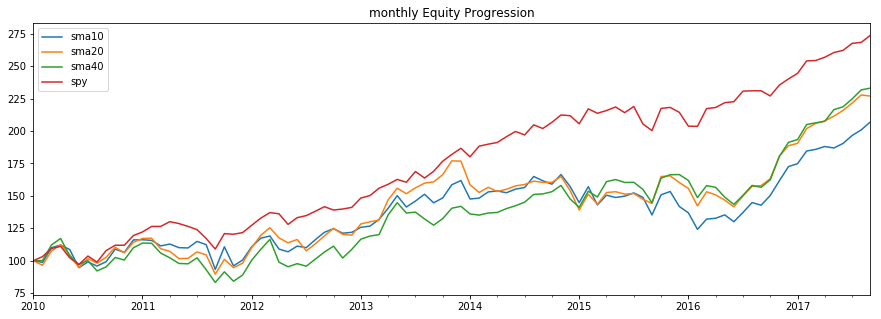

In [4]:
res2.plot(freq='m')

In [5]:
res2.display()

Stat                 sma10       sma20       sma40       spy
-------------------  ----------  ----------  ----------  ----------
Start                2010-01-03  2010-01-03  2010-01-03  2010-01-03
End                  2017-10-05  2017-10-05  2017-10-05  2017-10-05
Risk-free rate       0.00%       0.00%       0.00%       0.00%

Total Return         98.49%      132.31%     139.32%     162.97%
Daily Sharpe         0.58        0.71        0.74        0.92
Daily Sortino        0.69        0.86        0.93        1.16
CAGR                 9.24%       11.48%      11.91%      13.28%
Max Drawdown         -26.87%     -26.94%     -32.56%     -18.60%
Calmar Ratio         0.34        0.43        0.37        0.71

MTD                  2.87%       2.37%       2.68%       1.37%
3m                   9.47%       4.90%       6.71%       5.42%
6m                   14.57%      12.67%      16.04%      9.54%
YTD                  23.40%      23.12%      25.13%      15.55%
1Y                   44.68%      45.4